In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Valens\Documents\Python Anaconda\Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_with_category_with_flag.pkl'))

In [6]:
pd.options.display.max_columns = None

In [7]:
ords_prods_merge.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,28,6,11,3.0,5,0,both,both,Mid-range product,Regularly busy days,Most orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,prior,30,6,17,20.0,1,1,both,both,Mid-range product,Regularly busy days,Average orders,32,Regular customer,6.935811,Low Spender,8.0,Frequent customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,389851,709,prior,2,0,21,6.0,20,0,both,both,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low Spender,6.0,Frequent customer
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,652770,764,prior,1,3,13,0.0,10,0,both,both,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low Spender,9.0,Frequent customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,1813452,764,prior,3,4,17,9.0,11,1,both,both,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low Spender,9.0,Frequent customer


<AxesSubplot:>

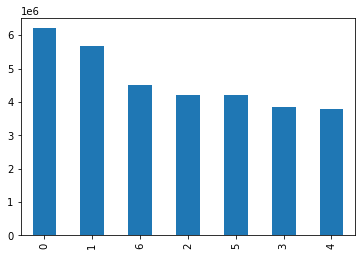

In [9]:
# Bar Charts
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

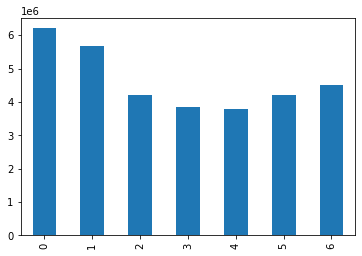

In [10]:
# Bar Charts with sort index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

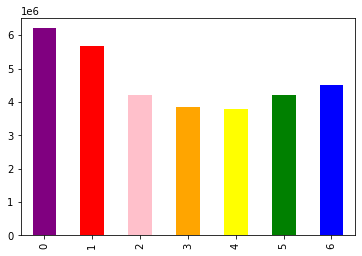

In [11]:
# Bar Charts with color
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

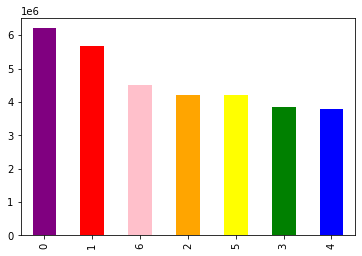

In [13]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

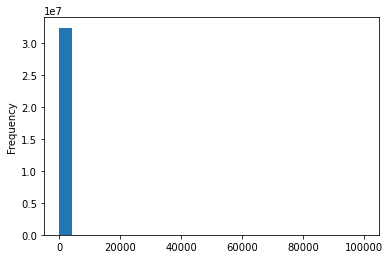

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)


In [18]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
ords_prods_merge['prices'].mean()

11.980225638375474

In [20]:
ords_prods_merge['prices'].median()

7.4

In [21]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

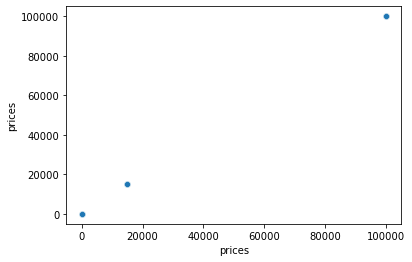

In [22]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)


In [23]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]


,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,exists,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_spender,spending_flag,median_of_days_since_prior_order,frequency_flag
13100147,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,171,912404,17,prior,12,2,14,5.0,5,0,both,both,High-range product,Regularly busy days,Average orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100148,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,181,603376,17,prior,22,6,16,4.0,3,1,both,both,High-range product,Regularly busy days,Average orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100149,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1944,3264360,135,prior,2,2,21,13.0,6,0,both,both,High-range product,Regularly busy days,Average orders,4,New customer,1154.792308,High Spender,11.5,Regular Customer
13100150,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1945,892534,135,prior,3,0,8,12.0,3,1,both,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High Spender,11.5,Regular Customer
13100151,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,5708,229704,342,prior,8,1,19,30.0,9,0,both,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,20.0,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3386542,2249946,204099,prior,29,0,8,4.0,1,0,both,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786877,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3386544,2363282,204099,prior,31,0,9,2.0,1,1,both,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786878,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3391313,3181945,204395,prior,13,3,15,8.0,25,0,both,both,High-range product,Slowest days,Average orders,15,Regular customer,451.153540,High Spender,4.0,Frequent customer
21786879,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3405096,2486215,205227,prior,7,3,20,4.0,8,0,both,both,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High Spender,7.0,Frequent customer


In [24]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [25]:
ords_prods_merge['prices'].max()

25.0

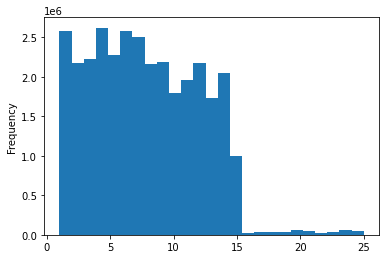

In [26]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

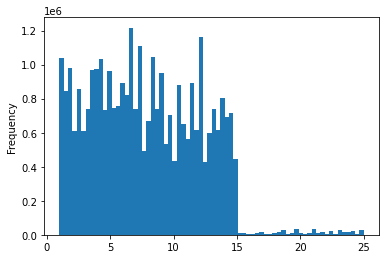

In [27]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [28]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [29]:
np.random.seed(4)


In [30]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [31]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
len(ords_prods_merge)

32404859

In [33]:
big = ords_prods_merge[dev]


In [34]:
small = ords_prods_merge[~dev]


In [35]:
len(big) + len(small)

32404859

In [37]:
df_2 = small[['orders_day_of_week','prices']]

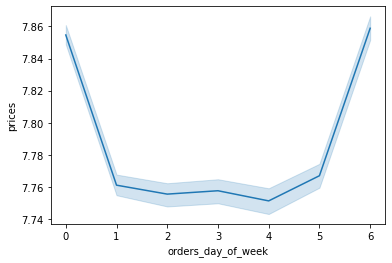

In [39]:
# Create a line chart for the 30% of the data
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [40]:
df_4 = small[['orders_day_of_week','prices']]

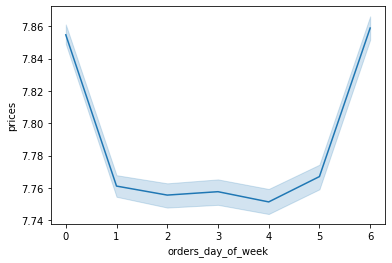

In [41]:
# Create a line chart for the 70% of data so we can confirm if it's the same
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

In [4]:
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)

In [5]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,2076096,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


In [6]:
crosstab.to_clipboard()
